<a href="https://colab.research.google.com/github/Jyothika-12/Pulse-Detection-Using-OpenCV/blob/main/crop_recommendation_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
# ========== Load Dataset ==========
df = pd.read_csv("/content/Crop_recommendation.csv")  # Must contain columns like N, P, K, temperature, humidity, pH, rainfall, label
print("Dataset Sample:\n", df.head())


Dataset Sample:
     N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice


In [6]:
# ========== Encode Target Labels ==========
le = LabelEncoder()
df['label_encoded'] = le.fit_transform(df['label'])

In [7]:
# ========== Features and Target ==========
X = df.drop(['label', 'label_encoded'], axis=1)
y = df['label_encoded']


In [8]:

# ========== Train-Test Split ==========
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# ========== Standardize Features ==========
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [10]:
# ========== Model Training ==========

# ✅ Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)


In [11]:
# ✅ XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb.fit(X_train_scaled, y_train)
xgb_pred = xgb.predict(X_test_scaled)

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [15:15:06] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [12]:
# ✅ Logistic Regression
lr = LogisticRegression(max_iter=300)
lr.fit(X_train_scaled, y_train)
lr_pred = lr.predict(X_test_scaled)

In [13]:
# ========== Evaluation ==========

def evaluate_model(name, y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    print(f"\n📊 {name} Accuracy: {acc * 100:.2f}%")
    print(classification_report(y_true, y_pred, target_names=le.classes_))

evaluate_model("Random Forest", y_test, rf_pred)
evaluate_model("XGBoost", y_test, xgb_pred)
evaluate_model("Logistic Regression", y_test, lr_pred)



📊 Random Forest Accuracy: 99.32%
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.92      1.00      0.96        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.92      1.00      0.96        11
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.96      0.98        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1.00    

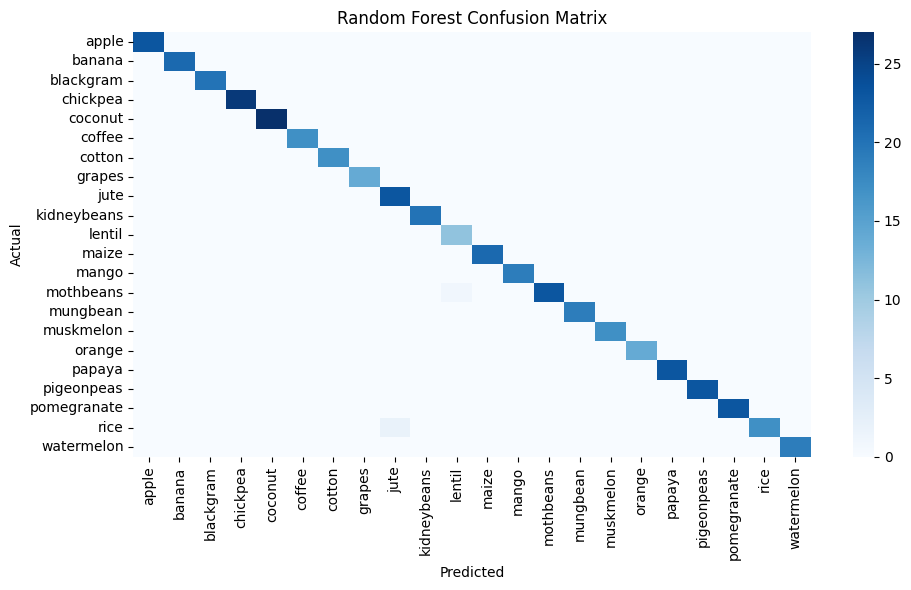

In [14]:
# ========== Confusion Matrix ==========
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 6))
    sns.heatmap(cm, cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_, fmt='d')
    plt.title(f"{title} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.xticks(rotation=90)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

plot_confusion_matrix(y_test, rf_pred, "Random Forest")



In [15]:
# ========== Prediction Function ==========
def recommend_crop(N, P, K, temp, humidity, ph, rainfall):
    input_data = np.array([[N, P, K, temp, humidity, ph, rainfall]])
    predicted = rf.predict(input_data)[0]
    crop = le.inverse_transform([predicted])[0]
    return crop



In [16]:
# ✅ Example Use
predicted_crop = recommend_crop(90, 42, 43, 22.0, 82.0, 6.5, 150)
print(f"\n🔮 Recommended Crop: {predicted_crop}")



🔮 Recommended Crop: rice


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
